# Chaos
*Chaotic Pendula* <br/>
**Author: Gavin DeBrun**

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import matplotlib.pyplot as plt
import math
from jax import jit, grad
import jax.numpy as jnp
import jax

import matplotlib.animation as animation
from IPython.display import HTML
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','jax','jnp','jit','grad','HTML','animation','animateMe_singlePendula']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2021, 2, 28, 15, 10, 53, 924313)

## Single Pendulum

In [2]:
def animateMe_singlePendula(positions): 
    positionArray=[]
    for position in positions:
        theta1=position[:,0]
        x1=params['Length']*np.sin(theta1)
        y1=-params['Length']*np.cos(theta1)
        l=len(x1)
        position=np.zeros((l,2))
        position[:,0]=x1
        position[:,1]=y1
        positionArray.append(position)
    
    fig, ax = plt.subplots()
    x_min=np.min([np.min(positions[:,0]) for positions in positionArray])*1.1
    x_max=np.max([np.max(positions[:,0]) for positions in positionArray])*1.1    
    y_min=np.min([np.min(positions[:,1]) for positions in positionArray])*1.1
    y_max=np.max([np.max(positions[:,1]) for positions in positionArray])*1.1
    y_max=np.max([y_max,0.1])
    y_max=np.max([y_max,x_max])
    x_max=y_max    
    y_min=np.min([y_min,x_min])
    x_min=y_min
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.plot(['0'],['0'],'o')
    lines=[]
    for positions in positionArray:
        lines.append((ax.plot([], [],'o', color = "g"))[0])
        lines.append((ax.plot([], [],'-', color = "g"))[0])

    def update(i, positionArray,lines):
        for idx,positions in enumerate(positionArray):
            lines[2*idx+0].set_data(positions[i,0],positions[i,1])
            lines[2*idx+1].set_data([0,positions[i,0]],[0,positions[i,1]])
        return lines
    ll=1
    ani = animation.FuncAnimation(fig, update, len(positionArray[0]), fargs=[positionArray, lines],
                      interval=20, blit=True,repeat=False)
    plt.close()
    return ani

### A Single Pendula

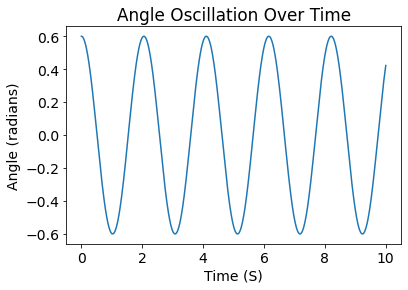

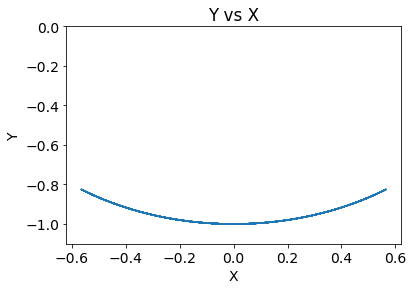

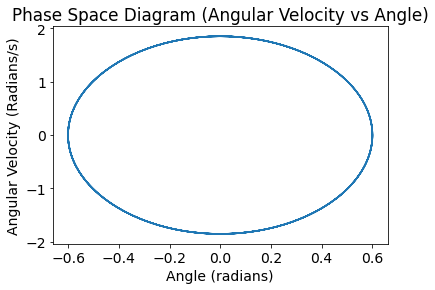

Angle amplitude is: 0.6000353864295057
Angle amplitude times max angular velocity is: 1.851267075432054


In [3]:
def F(angle, params):
  m = params["Mass"]
  L = params["Length"]
  g = 9.81
  force = -m*g*np.sin(angle)/L
  return force

def Step(time, angle, angularVelocity, params):
  m = params["Mass"]
  dt = params["dt"]

  a = F(angle, params)/m

  angularVelocityMidPoint = angularVelocity + a*dt/2
  angleMidPoint = angle + angularVelocity * dt/2

  aMidPoint = F(angleMidPoint, params)/m

  deltaAngularVelocity = aMidPoint*dt
  new_angularVelocity = angularVelocity + deltaAngularVelocity

  deltaAngle = angularVelocityMidPoint*dt
  new_angle = angle + deltaAngle

  new_time = time + dt

  return new_angle, new_angularVelocity, new_time

def Swing(params):
  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  angles = []
  initialAngle = params["initialAngle"]
  angles.append(initialAngle)

  angularVelocities = []
  initialAngularVelocity = params["initialAngularVelocity"]
  angularVelocities.append(initialAngularVelocity)

  L = params["Length"]

  positions = []
  initialPosition = np.array([np.sin(initialAngle)*L, -np.cos(initialAngle)*L])
  positions.append(initialPosition)

  velocities = []
  initialVelocity = np.array([initialAngularVelocity*L*np.sin(initialAngle), initialAngularVelocity*L*np.cos(initialAngle)])
  velocities.append(initialVelocity)

  T = params["T"]
  dt = params["dt"]

  for i in range(0, int(round(T/dt)), 1):
    new_angle, new_angularVelocity, new_time = Step(times[i], angles[i], angularVelocities[i], params)
    angles.append(new_angle)
    times.append(new_time)
    angularVelocities.append(new_angularVelocity)

    new_position = np.array([np.sin(new_angle)*L, -np.cos(new_angle)*L])
    positions.append(new_position)

    new_velocity = np.array([new_angularVelocity*L*np.sin(new_angle), new_angularVelocity*L*np.cos(new_angle)])
    velocities.append(new_velocity)


  return np.array(angles), np.array(angularVelocities), np.array(times), np.array(positions), np.array(velocities)

params = dict()
params["T"] = 10
params["dt"] = .01
params["initialAngle"] = np.array([.6])
params["Mass"] = 1
params["Length"] = 1
params["initialTime"] = 0
params["initialAngularVelocity"] = np.array([0])

angles, angularVelocities, times, positions, velocities = Swing(params)

plt.plot(times,angles)
plt.title("Angle Oscillation Over Time")
plt.ylabel("Angle (radians)")
plt.xlabel("Time (S)")
plt.show()

plt.plot(positions[:,0], positions[:,1])
plt.ylim(-1.1,0)
plt.title("Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.plot(angles, angularVelocities)
plt.title("Phase Space Diagram (Angular Velocity vs Angle)")
plt.xlabel("Angle (radians)")
plt.ylabel("Angular Velocity (Radians/s)")
plt.show()

A = angles.max()
print("Angle amplitude is:", A)
Aw = angularVelocities.max()
print("Angle amplitude times max angular velocity is:", Aw)

In [ ]:
ani=animateMe_singlePendula([angles])
HTML(ani.to_jshtml())

In [5]:
A = angles.max()
print("Angle amplitude is:", A)
Aw = angularVelocities.max()
print("Angle amplitude times max angular velocity is:", Aw)

Angle amplitude is: 0.6000353864295057
Angle amplitude times max angular velocity is: 1.851267075432054


### Pendula and the different starting positions

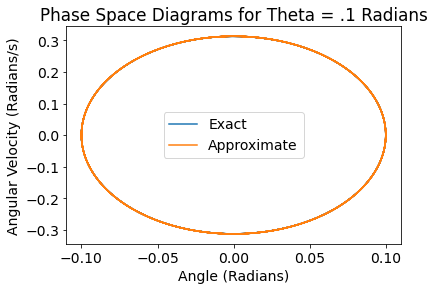

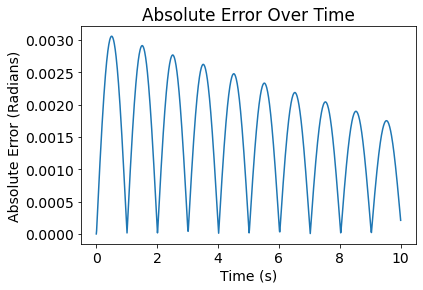

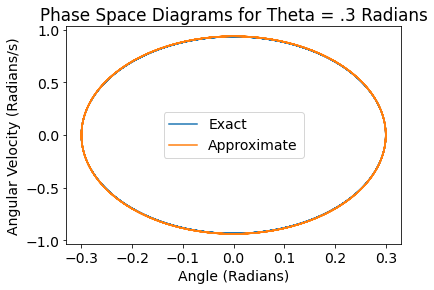

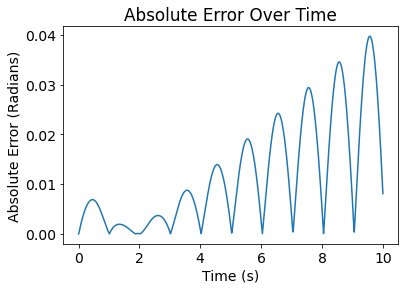

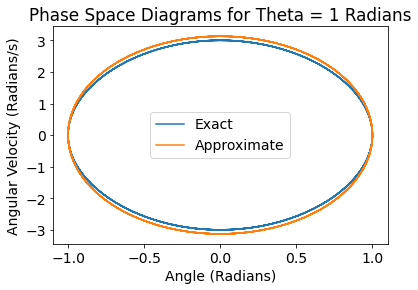

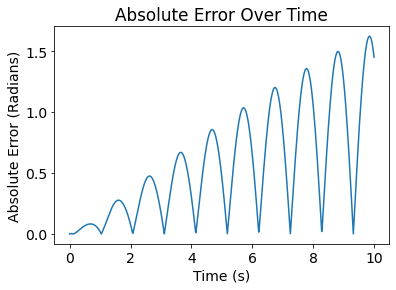

In [6]:
def approximate(params, times):
  L = params["Length"]
  w = np.sqrt(9.81/L)

  approximateAngles = []
  initialAngle = params["initialAngle"]
  approximateAngles.append(initialAngle)

  approximateAngularVelocities = []
  initialAngularVelocity = params["initialAngularVelocity"]
  approximateAngularVelocities.append(initialAngularVelocity)

  approximatePositions = []
  initialPosition = np.array([np.sin(initialAngle)*L, -np.cos(initialAngle)*L])
  approximatePositions.append(initialPosition)

  

  for i in range(0,len(times) - 1, 1):
    theta = initialAngle * np.cos(w*times[i])
    approximateAngles.append(theta)

    angularVelocity = -initialAngle * w * np.sin(w*times[i])
    approximateAngularVelocities.append(angularVelocity)

    position = np.array([np.sin(theta)*L, -np.cos(theta)*L])
    approximatePositions.append(position)

  return np.array(approximateAngles), np.array(approximateAngularVelocities), np.array(positions)

params["initialAngle"] = np.array([.1])
angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(angles, angularVelocities, label = "Exact")
approximateAngles, approximateAngularVelocities, approximatePositions = approximate(params, times)
plt.plot(approximateAngles, approximateAngularVelocities, label = "Approximate")
plt.title("Phase Space Diagrams for Theta = .1 Radians")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians/s)")
plt.legend()
plt.show()
plt.plot(times, np.abs(approximateAngles - angles))
plt.title("Absolute Error Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Absolute Error (Radians)")
plt.show()


params["initialAngle"] = np.array([.3])
angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(angles, angularVelocities, label = "Exact")
approximateAngles, approximateAngularVelocities, approximatePositions = approximate(params, times)
plt.plot(approximateAngles, approximateAngularVelocities, label = "Approximate")
plt.title("Phase Space Diagrams for Theta = .3 Radians")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians/s)")
plt.legend()
plt.show()
plt.plot(times, np.abs(approximateAngles - angles))
plt.title("Absolute Error Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Absolute Error (Radians)")
plt.show()


params["initialAngle"] = np.array([1])
angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(angles, angularVelocities, label = "Exact")
approximateAngles, approximateAngularVelocities, approximatePositions = approximate(params, times)
plt.plot(approximateAngles, approximateAngularVelocities, label = "Approximate")
plt.title("Phase Space Diagrams for Theta = 1 Radians")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians/s)")
plt.legend()
plt.show()
plt.plot(times, np.abs(approximateAngles - angles))
plt.title("Absolute Error Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Absolute Error (Radians)")
plt.show()

In [ ]:
#For A = 1 rad
ani=animateMe_singlePendula([angles, approximateAngles])
HTML(ani.to_jshtml())

### Damped and Driven and phase plots

| Parameter | Version 1  | Version 2  |  Version 3 |
|---|---|---|---|
|  $A$ (damping)                | 0  | 0.1  | 0.1  |
|  $B$ (restoring force)        | 0.1  | 1  | 1  |
|  $C$ (external driving force) | 0  |  0.1 | 2  |
| $m$                           | 1  |  1 | 1  |
| $\Omega$ (driving frequency)  | N/A  |  2 |  1.2 |
| $x_0$      |  0 | 0  | 0  |
| $v_0$      | 0.1  | 0.1  | 0.1  |
| $t_{max}$  | 120  | 120  | 500  |
| $dt$       | .01  | .01  |  .01 |

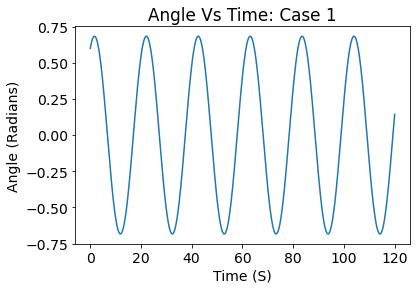

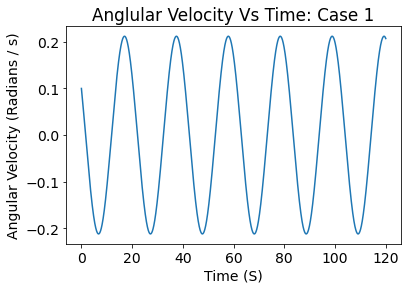

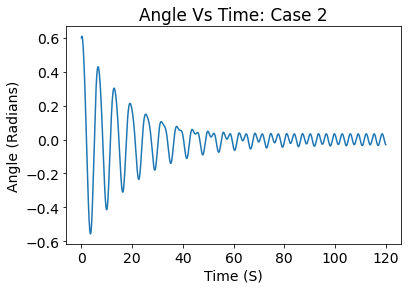

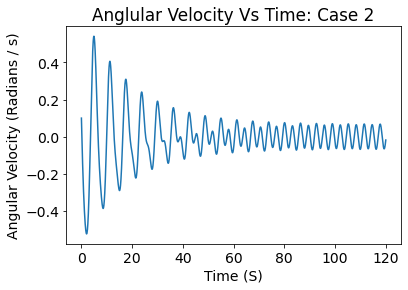

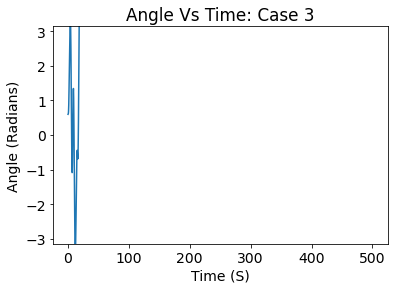

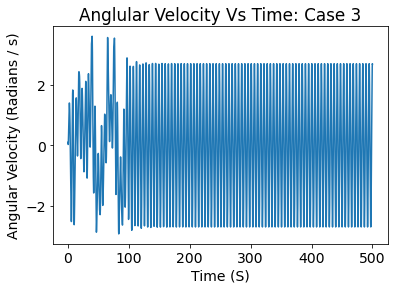

In [8]:
def F(t, angle, angularVelocity, params):
  A = params["A"]
  B = params["B"]
  C = params["C"]
  OMEGA = params["OMEGA"]
  F = -A*angularVelocity - B*np.sin(angle) + C*np.sin(OMEGA * t)
  return F

def Step(time, angle, angularVelocity, params):
  m = params["Mass"]
  dt = params["dt"]

  a = F(time, angle, angularVelocity, params)

  angularVelocityMidPoint = angularVelocity + a*dt/2
  angleMidPoint = angle + angularVelocity * dt/2

  aMidPoint = F(time, angleMidPoint, angularVelocityMidPoint, params)

  deltaAngularVelocity = aMidPoint*dt
  new_angularVelocity = angularVelocity + deltaAngularVelocity

  deltaAngle = angularVelocityMidPoint*dt
  new_angle = angle + deltaAngle

  new_time = time + dt

  return new_angle, new_angularVelocity, new_time

def Swing(params):
  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  angles = []
  initialAngle = params["initialAngle"]
  angles.append(initialAngle)

  angularVelocities = []
  initialAngularVelocity = params["initialAngularVelocity"]
  angularVelocities.append(initialAngularVelocity)

  L = params["Length"]

  positions = []
  initialPosition = np.array([np.sin(initialAngle)*L, -np.cos(initialAngle)*L])
  positions.append(initialPosition)

  velocities = []
  initialVelocity = np.array([initialAngularVelocity*L*np.sin(initialAngle), initialAngularVelocity*L*np.cos(initialAngle)])
  velocities.append(initialVelocity)

  T = params["T"]
  dt = params["dt"]

  for i in range(0, int(round(T/dt)), 1):
    new_angle, new_angularVelocity, new_time = Step(times[i], angles[i], angularVelocities[i], params)
    angles.append(new_angle)
    times.append(new_time)
    angularVelocities.append(new_angularVelocity)

    new_position = np.array([np.sin(new_angle)*L, -np.cos(new_angle)*L])
    positions.append(new_position)

    new_velocity = np.array([new_angularVelocity*L*np.sin(new_angle), new_angularVelocity*L*np.cos(new_angle)])
    velocities.append(new_velocity)


  return np.array(angles), np.array(angularVelocities), np.array(times), np.array(positions), np.array(velocities)

params["dt"] = .01
params["initialAngle"] = np.array([.6])
params["Mass"] = 1
params["Length"] = 1
params["initialTime"] = 0
params["initialAngularVelocity"] = np.array([.1])


params["A"] = 0
params["B"] = .1
params["C"] = 0
params["OMEGA"] = 0
params["T"] = 120

angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(times,angles)
plt.title("Angle Vs Time: Case 1")
plt.xlabel("Time (S)")
plt.ylabel("Angle (Radians)")
plt.show()
plt.plot(times, angularVelocities)
plt.title("Anglular Velocity Vs Time: Case 1")
plt.xlabel("Time (S)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.show()

params["A"] = .1
params["B"] = 1
params["C"] = .1
params["OMEGA"] = 2
params["T"] = 120

angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(times,angles)
plt.title("Angle Vs Time: Case 2")
plt.xlabel("Time (S)")
plt.ylabel("Angle (Radians)")
plt.show()
plt.plot(times, angularVelocities)
plt.title("Anglular Velocity Vs Time: Case 2")
plt.xlabel("Time (S)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.show()

params["A"] = .1
params["B"] = 1
params["C"] = 2
params["OMEGA"] = 1.2
params["T"] = 500

angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(times,angles)
plt.ylim(-np.pi, np.pi)
plt.title("Angle Vs Time: Case 3")
plt.xlabel("Time (S)")
plt.ylabel("Angle (Radians)")
plt.show()
plt.plot(times, angularVelocities)
plt.title("Anglular Velocity Vs Time: Case 3")
plt.xlabel("Time (S)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.show()

In [ ]:
#For case 3
angles = angles[:5000]
ani=animateMe_singlePendula([angles])
HTML(ani.to_jshtml())

### imple pendulum phase space trajectory

| Parameter | Version 2  | Version 4  |
|---|---|---|
|  $A$ (damping)                | 0.1  | 0.1  |
|  $B$ (restoring force)        |  1  | 2  |
|  $C$ (external driving force) |  0.1 | 2  |
| $m$                           |  1 | 1  |
| $\Omega$ (driving frequency)  |  2 |  1.2 |
| $x_0$      |   0  | 0  |
| $v_0$      | 0.1  | 0.1  |
| $t_{max}$  | 500  | 500  |
| $dt$       | .01  |  .01 |

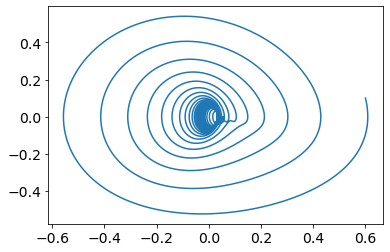

In [10]:
params["A"] = .1
params["B"] = 1
params["C"] = .1
params["OMEGA"] = 2
params["T"] = 500
angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(angles, angularVelocities)
plt.show()
angles1 = angles

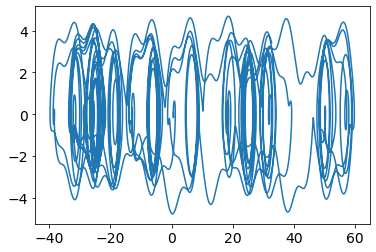

In [11]:
params["A"] = .1
params["B"] = 2
params["C"] = 2
params["OMEGA"] = 1.2
params["T"] = 500
angles, angularVelocities, times, positions, velocities = Swing(params)
plt.plot(angles, angularVelocities)
plt.show()
angles2 = angles

In [ ]:
l=len(positions)
ani=animateMe_singlePendula([angles1[::l//5000], angles2[::l//5000]])
HTML(ani.to_jshtml())

## Double Pendulum

In [13]:
def animateMe_doublePendula(positions): 
    positionArray=[]
    for position in positions:
        theta1=position[:,0]
        theta2=position[:,1]
        x1=params['Length'][0]*np.sin(theta1)
        y1=-params['Length'][0]*np.cos(theta1)
        x2=params['Length'][0]*np.sin(theta1)+params["Length"][1]*np.sin(theta2)
        y2=-params['Length'][0]*np.cos(theta1)-params["Length"][1]*np.cos(theta2)
        l=len(x1)
        positions=np.zeros((l,4))
        positions[:,0]=x1
        positions[:,1]=y1
        positions[:,2]=x2
        positions[:,3]=y2
        positionArray.append(positions)
    fig, ax = plt.subplots()
    x_min=np.min([np.min(list(positions[:,0])+list(positions[:,2])) for positions in positionArray])*1.1
    x_max=np.max([np.max(list(positions[:,0])+list(positions[:,2])) for positions in positionArray])*1.1    
    y_min=np.min([np.min(list(positions[:,1])+list(positions[:,3])) for positions in positionArray])*1.1
    y_max=np.max([np.max(list(positions[:,1])+list(positions[:,3])) for positions in positionArray])*1.1
    y_max=np.max([y_max,0.1])
    y_max=np.max([y_max,x_max])
    x_max=y_max    
    y_min=np.min([y_min,x_min])
    x_min=y_min
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max));
    ax.plot(['0'],['0'],'o')
    lines=[]
    colorWheel=['g','b','r']
    for idx,positions in enumerate(positionArray):
        lines.append((ax.plot([], [],'o', color = colorWheel[0]))[0])
        lines.append((ax.plot([], [],'-', color = colorWheel[0]))[0])
        lines.append((ax.plot([], [],'o', color = colorWheel[0]))[0])
        lines.append((ax.plot([], [],'-', color = colorWheel[0]))[0])
        
        
    def update(i, positionArray,lines):
        for idx,positions in enumerate(positionArray):
            lines[4*idx+0].set_data(positions[i,0],positions[i,1])
            lines[4*idx+1].set_data([0,positions[i,0]],[0,positions[i,1]])
            lines[4*idx+2].set_data(positions[i,2],positions[i,3])
            lines[4*idx+3].set_data([positions[i,0],positions[i,2]],[positions[i,1],positions[i,3]])
        return lines
    ll=1
    ani = animation.FuncAnimation(fig, update, len(positionArray[0]), fargs=[positionArray, lines],
                      interval=20, blit=True,repeat=False)
    plt.close()
    return ani

### Simulating double pendula

In [14]:
def F(t, angle, angularVelocity, params):
  m1 = params["Mass"][0]
  m2 = params["Mass"][1]
  g = 9.81
  L1 = params["Length"][0]
  L2 = params["Length"][0]
  angle1 = angle[0]
  angle2 = angle[1]
  omega1 = angularVelocity[0]
  omega2 = angularVelocity[1]

  F1 = -L2/L1 * ( m2/(m1+m2) ) * omega2**2 * np.sin(angle1-angle2) - g/L1 * np.sin(angle1)
  F2 = L1/L2 * omega1**2 * np.sin(angle1-angle2) - g/L2 * np.sin(angle2)
  alpha1 = L2/L1 * (m2 / (m1+m2) ) * np.cos(angle1-angle2)
  alpha2 = L1/L2 * np.cos(angle1-angle2)
  den=(1-alpha1*alpha2)

  a1 = (F1 - alpha1 * F2) / den
  a2 = (-alpha2 * F1 + F2) / den

  return np.array([a1, a2])

def Step(time, angle, angularVelocity, params):
  m1 = params["Mass"][0]
  m2 = params["Mass"][1]
  dt = params["dt"]

  a = F(time, angle, angularVelocity, params)

  angularVelocityMidPoint = angularVelocity + a*dt/2
  angleMidPoint = angle + angularVelocity * dt/2

  aMidPoint = F(time, angleMidPoint, angularVelocityMidPoint, params)

  deltaAngularVelocity = aMidPoint*dt
  new_angularVelocity = angularVelocity + deltaAngularVelocity

  deltaAngle = angularVelocityMidPoint*dt
  new_angle = angle + deltaAngle

  new_time = time + dt

  return new_angle, new_angularVelocity, new_time

def Swing(params):
  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  angles = []
  initialAngle = params["initialAngle"]
  angles.append(initialAngle)

  angularVelocities = []
  initialAngularVelocity = params["initialAngularVelocity"]
  angularVelocities.append(initialAngularVelocity)

  L = params["Length"]

  positions = []
  initialPosition = np.array([np.sin(initialAngle)*L, -np.cos(initialAngle)*L])
  positions.append(initialPosition)

  velocities = []
  initialVelocity = np.array([initialAngularVelocity*L*np.sin(initialAngle), initialAngularVelocity*L*np.cos(initialAngle)])
  velocities.append(initialVelocity)

  T = params["T"]
  dt = params["dt"]

  for i in range(0, int(round(T/dt)), 1):
    new_angle, new_angularVelocity, new_time = Step(times[i], angles[i], angularVelocities[i], params)
    angles.append(new_angle)
    times.append(new_time)
    angularVelocities.append(new_angularVelocity)

    new_position = np.array([np.sin(new_angle)*L, -np.cos(new_angle)*L])
    positions.append(new_position)

    new_velocity = np.array([new_angularVelocity*L*np.sin(new_angle), new_angularVelocity*L*np.cos(new_angle)])
    velocities.append(new_velocity)


  return np.array(angles), np.array(angularVelocities), np.array(times), np.array(positions), np.array(velocities)

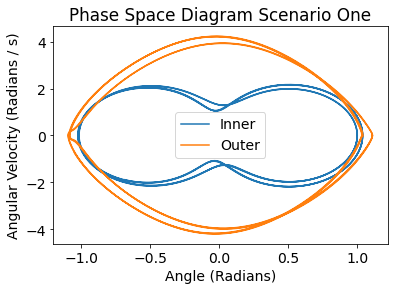

In [15]:
params["Mass"] = np.array([1, 1])
params["Length"] = np.array([1, 1])
params["dt"] = .01
params["T"] = 15.0
params["initialAngle"] = np.array([1, 1.11])
params["initialAngularVelocity"] = np.array([0,0])
params["initialTime"] = 0

angles, angularVelocities, times, positions, velocities = Swing(params)

plt.plot(angles[:,0], angularVelocities[:,0], label = "Inner")
plt.plot(angles[:,1], angularVelocities[:,1], label = "Outer")
plt.title("Phase Space Diagram Scenario One")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.legend()
plt.show()

In [ ]:
l=len(angles)
ani=animateMe_doublePendula([angles])
HTML(ani.to_jshtml())

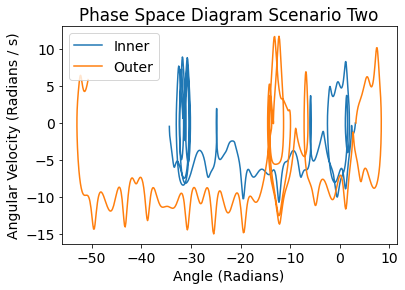

In [17]:
params["initialAngle"] = np.array([3.14, 3.14+.11])

angles, angularVelocities, times, positions, velocities = Swing(params)

plt.plot(angles[:,0], angularVelocities[:,0], label = "Inner")
plt.plot(angles[:,1], angularVelocities[:,1], label = "Outer")
plt.title("Phase Space Diagram Scenario Two")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.legend()
plt.show()

In [ ]:
l=len(angles)
ani=animateMe_doublePendula([angles])
HTML(ani.to_jshtml())

### Chaos

In [19]:
params["initialAngle"] = np.array([3.14, 3.25])
angleList = []
for i in range(10):
  params["initialAngle"][1] += 1e-4
  angles, angularVelocities, times, positions, velocities = Swing(params)
  angleList.append(angles)


In [ ]:
ani=animateMe_doublePendula(angleList)
HTML(ani.to_jshtml())


### Solving Euler-Lagrange with no work 

In [21]:
def Lagrangian(angle, velocity, params, time):
  m1 = params["Mass"][0]
  m2 = params["Mass"][1]
  L1 = params["Length"][0]
  L2 = params["Length"][1]
  angle1 = angle[0]
  angle2 = angle[1]
  Y1 = -L1*jnp.cos(angle1)
  Y2 = -L1*jnp.cos(angle1)-L2*jnp.cos(angle2)
  v1 = velocities[0]
  v2 = velocities[1]
  
  g = 9.81
  

  T = .5*m1*v1**2 + .5*m2*v2**2
  V = m1*g*Y1 + m2*g*Y2
  return T-V

In [22]:
def Step(time, angle, angularVelocity, velocity, params):
  m1 = params["Mass"][0]
  m2 = params["Mass"][1]
  dt = params["dt"]
  L1 = params["Length"][0]
  L2 = params["Length"][1]

  f1=jit(jax.hessian(jit(Lagrangian), 1))
  f2=jit(jax.grad(jit(Lagrangian), 0))
  f3=jit(jax.jacfwd(jit(jax.grad(jit(Lagrangian), 1)), 0))

  a = (jax.numpy.linalg.pinv(f1(angle, velocity,params,time)) @ (
        f2(angle,velocity,params,time) - f3(angle,velocity,params,time) @ velocity))

  print(a)
  print(velocities)
  angularVelocityMidPoint = angularVelocity + a*dt/2
  angleMidPoint = angle + angularVelocity * dt/2


  aMidPoint = (jax.numpy.linalg.pinv(f1(angle, velocity,params,time)) @ (
        f2(angle,velocity,params,time) - f3(angle,velocity,params,time) @ velocity))

  deltaAngularVelocity = aMidPoint*dt
  new_angularVelocity = angularVelocity + deltaAngularVelocity

  deltaAngle = angularVelocityMidPoint*dt
  new_angle = angle + deltaAngle

  new_time = time + dt
  #print(new_angle)

  return new_angle, new_angularVelocity, new_time

def Swing(params):
  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  angles = []
  initialAngle = params["initialAngle"]
  angles.append(initialAngle)

  angularVelocities = []
  initialAngularVelocity = params["initialAngularVelocity"]
  angularVelocities.append(initialAngularVelocity)

  L1 = params["Length"][0]
  L2 = params["Length"][1]
  velocities = []
  v1 = (initialAngularVelocity[0]*L1*jnp.sin(initialAngle[0])**2 + initialAngularVelocity[0]*L1*jnp.cos(initialAngle[0])**2)**.5
  v2 = (initialAngularVelocity[1]*L2*jnp.sin(initialAngle[1])**2 + initialAngularVelocity[1]*L2*jnp.cos(initialAngle[1])**2)**.5
  initialVelocity = jnp.array([v1, v2])
  velocities.append(initialVelocity)


  L = params["Length"]
  T = params["T"]
  dt = params["dt"]

  for i in range(0, int(round(T/dt)), 1):
    new_angle, new_angularVelocity, new_time = Step(times[i], angles[i], angularVelocities[i], velocities[i], params)
    angles.append(new_angle)
    times.append(new_time)
    angularVelocities.append(new_angularVelocity)

    v1 = (new_angularVelocity[0]*L1*jnp.sin(new_angle[0])**2 + new_angularVelocity[0]*L1*jnp.cos(new_angle[0])**2)**.5
    v2 = (new_angularVelocity[1]*L1*jnp.sin(new_angle[1])**2 + new_angularVelocity[1]*L1*jnp.cos(new_angle[1])**2)**.5
    new_velocity = jnp.array([v1,v2])
    velocities.append(new_velocity)


  return jnp.array(angles), jnp.array(angularVelocities), jnp.array(times)

In [ ]:
params["Mass"] = jnp.array([jnp.float64(1), jnp.float64(1)])
params["Length"] = jnp.array([jnp.float64(1), jnp.float64(1)])
params["dt"] = jnp.float64(.01)
params["T"] = jnp.float64(.1)
params["initialAngle"] = jnp.array([jnp.float64(1), jnp.float64(1.11)])
params["initialAngularVelocity"] = jnp.array([jnp.float64(1),jnp.float64(1)])
params["initialTime"] = jnp.float64(0)
angles, angularVelocities, times = Swing(params)

In [ ]:
ani=animateMe_doublePendula([angles])
HTML(ani.to_jshtml())

In [ ]:
plt.plot(angles[:,0], angularVelocities[:,0], label = "Inner")
plt.plot(angles[:,1], angularVelocities[:,1], label = "Outer")
plt.title("Phase Space Diagram")
plt.xlabel("Angle (Radians)")
plt.ylabel("Angular Velocity (Radians / s)")
plt.legend()
plt.show()
print("Same general shape as before, but deviates somewhat.")